# Tutorial: Hello Bash and Python

In this tutorial we will familiarise ourselves with bash and python, and Notebooks (inadvertantly). Please load this notebook in `colab.research.google.com` if you do not have a local instance of JupyterHub/JupyterLab running.


Submission:

The submission for this tutorial requires a submission on Git, as well as one on SUNLearn. You will receive an email to your student account asking you to create an account on Gitlab




In [ ]:
import pandas as pd

In [ ]:
# updated packages (pull from repository and refresh on local)
! sudo apt update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [903 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [1,100 kB]
Get:13 http://ppa.launchpad.net/deadsnakes/ppa/ubu

In [ ]:
! sudo apt-get install vim.tiny

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'vim-tiny' for regex 'vim.tiny'
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  vim-common xxd
Suggested packages:
  indent
The following NEW packages will be installed:
  vim-common vim-tiny xxd
0 upgraded, 3 newly installed, 0 to remove and 27 not upgraded.
Need to get 597 kB of archives.
After this operation, 1,841 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 xxd amd64 2:8.0.1453-1ubuntu1.8 [49.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-common all 2:8.0.1453-1ubuntu1.8 [71.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-tiny amd64 2:8.0.1453-1ubuntu1.8 [476 kB]
Fetched 597 kB in 2s (360 kB/s)
debconf: unable t

## Question 1: Bash

Retrieve data and interogate it with bash before using python tooling. This is useful as you may struggle with type or malformed files and a quick interogation may reveal those issues.


### Question 1.1

Run the bash command `wget` to retrieve a file located at `https://storage.googleapis.com/bdt-beam/users_v.csv` [1]

In [ ]:
%%bash 

wget https://storage.googleapis.com/bdt-beam/users_v.csv

--2022-08-10 13:29:52--  https://storage.googleapis.com/bdt-beam/users_v.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143675 (140K) [text/csv]
Saving to: ‘users_v.csv’

     0K .......... .......... .......... .......... .......... 35% 39.0M 0s
    50K .......... .......... .......... .......... .......... 71% 51.9M 0s
   100K .......... .......... .......... ..........           100% 49.0M=0.003s

2022-08-10 13:29:53 (45.7 MB/s) - ‘users_v.csv’ saved [143675/143675]



### Question 1.2

Use a bash command to view the top ten elements of the file (to confirm that things are as you expect) [1]

In [ ]:
%%bash

head -10 users_v.csv

user_id,name,gender,age,address,date_joined
1,Anthony Wolf,male,73,New Rachelburgh-VA-49583,2019/03/13
2,James Armstrong,male,56,North Jillianfort-UT-86454,2020/11/06
3,Cody Shaw,male,75,North Anne-SC-53799,2004/05/29
4,Sierra Hamilton,female,76,New Angelafurt-ME-46190,2005/08/26
5,Chase Davis,male,31,South Bethmouth-WI-18562,2018/04/30
6,Sierra Andrews,female,21,Ryanville-MI-69690,2007/05/25
7,Ann Stone,female,41,Smithmouth-SD-17340,2005/01/05
8,Karen Santos,female,34,Mariaville-AK-29888,2003/12/12
9,Ronald Meyer,male,41,North Cherylhaven-NJ-04197,2015/11/14


### Question 1.3

Use a bash command to determine the number of rows in the file [1]

In [ ]:
%%bash

wc -l users_v.csv

2358 users_v.csv


### Question 1.4

Suppose the file is too large for initial exploration, let's take a quick sample so that we can continue working to see what is in the data set. Loading it into Pandas at this point will mean that we are using all that memory in any case, so let's sample it before we load it.

Take a random sample of the file (limited the result to 1000 lines) and create another file called `users_sample.csv`, using only bash commands [3]

Hint: redirect a stream into a the output file.

In [ ]:
%%bash

awk '
BEGIN   { srand(); c = 1000 }
c/NR >= rand() { lines[x++ % c] = $0 }
END { for (i in lines)  print > "users_sample.csv" }

' users_v.csv

### Question 1.5 

* Sort your file by ascending `user_id`s [1]
* Overwrite the current `users_sample.csv` with the ordered content [1]
* Print the last ten lines of this file [1]

In [ ]:
%%bash 

-k users_sample.csv

bash: line 2: -k: command not found


## Question 2: Python

Perform analysis with Python

### Question 2.1

Load the original `users_v.csv` into a Pandas dataframe [1]

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/bdt-beam/users_v.csv')

### Question 2.2

Display/print the top ten lines of the dataframe [1]



In [ ]:
df.head(10)

user_id             name  gender  age                     address  \
0        1     Anthony Wolf    male   73    New Rachelburgh-VA-49583   
1        2  James Armstrong    male   56  North Jillianfort-UT-86454   
2        3        Cody Shaw    male   75         North Anne-SC-53799   
3        4  Sierra Hamilton  female   76     New Angelafurt-ME-46190   
4        5      Chase Davis    male   31    South Bethmouth-WI-18562   
5        6   Sierra Andrews  female   21          Ryanville-MI-69690   
6        7        Ann Stone  female   41         Smithmouth-SD-17340   
7        8     Karen Santos  female   34         Mariaville-AK-29888   
8        9     Ronald Meyer    male   41  North Cherylhaven-NJ-04197   
9       10    Steven Rivera    male   43          Wayneside-VT-29040   

  date_joined  
0  2019/03/13  
1  2020/11/06  
2  2004/05/29  
3  2005/08/26  
4  2018/04/30  
5  2007/05/25  
6  2005/01/05  
7  2003/12/12  
8  2015/11/14  
9  2003/05/15

### Question 2.3

Find the age of the oldest and youngest person in the dataset [1]

Hint: you can use the `print(..., ...)` function to display the two values if you construct it as two arguments

In [ ]:
print(min(df.age), max(df.age))

18 80


### Question 2.4

Draw descriptive statistics (one-liner) for the `age` column - these statistics should include `count`, `mean`, and `std` [1]

Hint: this command has a parallel in R

In [ ]:
df['age'].describe()

count    2357.000000
mean       49.054731
std        18.206348
min        18.000000
25%        33.000000
50%        49.000000
75%        65.000000
max        80.000000
Name: age, dtype: float64

### Question 2.5

* Using anonymous functions (`lambda`), create a `surname` column from the name column (you may assume that the last word without a space is the surname) [2]
* Display the last 10 lines of your dataframe [1]


In [ ]:
df = df.assign(new = lambda x: df["name"].str.split(" ", n =1 , expand = False))

df.drop(["name"], axis = 1)

df[['name', 'surname']] = pd.DataFrame(df.new.tolist(), index = df.index)

df.drop(["new"], axis = 1, inplace = True)

df.tail(10)

user_id         name  gender  age                    address  \
2347     2348     Victoria  female   68    Lake Jamesberg-NY-88824   
2348     2349        Chris    male   46  Port Richardside-NY-77994   
2349     2350     Kimberly  female   19      East Anthony-GA-00646   
2350     2351      William    male   67   Lake Parkerside-MN-06905   
2351     2352        Nancy  female   80        Jamesshire-AK-88437   
2352     2353     Brittney  female   40         Brownland-CO-71229   
2353     2354      Allison  female   43        Port Logan-MD-38588   
2354     2355  Christopher    male   68   North Justinton-VA-32798   
2355     2356         Mark    male   67    New Kayleefurt-MA-82581   
2356     2357       Steven    male   45         Mistytown-HI-31737   

     date_joined   surname  
2347  2001/09/03   Edwards  
2348  2011/03/18     Ellis  
2349  2021/06/20     Smith  
2350  2005/12/21    Nelson  
2351  2001/12/12     Clark  
2352  2005/07/10    Graham  
2353  2008/11/30   Schmidt  
2354  2006/08/01   Johnson  
2355  2013/11/16     Brown  
2356  2015/03/21  Robinson

### Question 2.6

* Convert `date_joined` to a pandas series of type `datetime`  [1]
* Overwrite the original `date_joined` column with the result [1]

In [ ]:
df['date_joined'] = pd.to_datetime(df['date_joined'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      2357 non-null   int64         
 1   name         2357 non-null   object        
 2   gender       2357 non-null   object        
 3   age          2357 non-null   int64         
 4   address      2357 non-null   object        
 5   date_joined  2357 non-null   datetime64[ns]
 6   surname      2357 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 129.0+ KB


## Question 3: Git

Push your notebook to Git. If you don't have any Git tooling installed on your machines, download a preferred tool.

 * Create a repository (named `day1-tutorial`) on Gitlab (check your student email for sign-up/membership request to Gitlab) [1]
 * Push this notebook to that repository [1]

## The End

Now that it is a datetime, we can how many users signed up/registered.

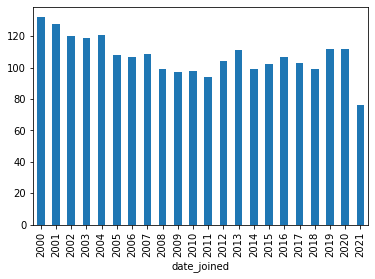

In [ ]:
import matplotlib

%matplotlib inline 

df.user_id.groupby([df.date_joined.dt.year]).count().plot(kind="bar")